In [68]:
import pandas as pd
diabetes = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
diabetes

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [69]:
Selected_features = ['GenHlth' ,'CholCheck' ,'HighBP' ,'AnyHealthcare' ,'PhysActivity' ,'BMI' ,
'HighChol' ,'Age' ,'Fruits' ,'Income' ,'DiffWalk' ,'Education' ,'HeartDiseaseorAttack'
,'PhysHlth' , 'Smoker']
Target = 'Diabetes_binary'

In [70]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [71]:
X = diabetes[Selected_features]
y = diabetes[Target]

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [73]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2)

In [74]:
cat  = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier(verbose = -1)
xgb = XGBClassifier()

# Voting Ensemble

In [75]:
model = [('cat', cat), ('lgb', lgb), ('xgb', xgb)]

clf = VotingClassifier(model , voting='soft' , n_jobs = -1)

# Define the final estimator for stacking
final_estimator = LogisticRegression()  # You can also try LGBMClassifier or other models

# Create StackingClassifier
estimators = [('cat', cat), ('lgb', lgb), ('xgb', xgb)]

voting_clf = VotingClassifier(estimators=estimators, n_jobs=-1)

# Example of performing cross-validation to evaluate the model
# X_train and y_train should be your dataset features and target labels
scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Accuracy Scores: ", scores)
print("Mean Accuracy: ", np.mean(scores))

Cross-Validation Accuracy Scores:  [0.75050835 0.752807   0.75351428 0.74058355 0.75260831]
Mean Accuracy:  0.7500043000948741


In [76]:
clf.fit(X_train , y_train)

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x1536e7650>),
                             ('lgb', LGBMClassifier(verbose=-1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_typ...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 n_jobs=-1, voting='soft')

In [77]:
y_probs = clf.predict_proba(X_test)

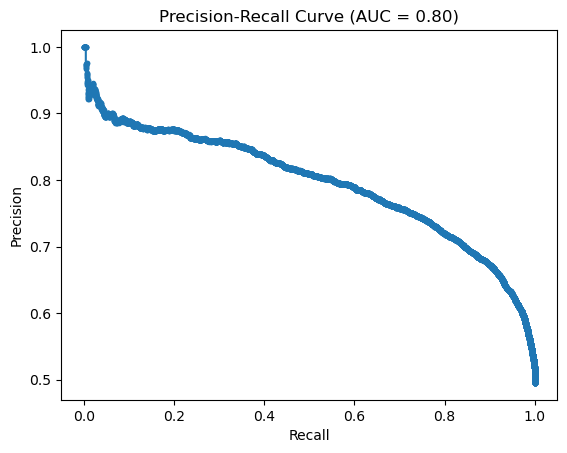

In [78]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_probs_positive_class = y_probs[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_probs_positive_class)

auprc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auprc:.2f})')
plt.show()

# Stacked Ensemble

In [79]:
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np

# Define base classifiers
cat = CatBoostClassifier(verbose=0)  # CatBoost Classifier
lgb = LGBMClassifier(verbose=-1)     # LightGBM Classifier
xgb = XGBClassifier()                # XGBoost Classifier

# Define the final estimator for stacking
final_estimator = LogisticRegression()  # You can also try LGBMClassifier or other models

# Create StackingClassifier
estimators = [('cat', cat), ('lgb', lgb), ('xgb', xgb)]

stacked_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, n_jobs=-1)

# Example of performing cross-validation to evaluate the model
# X_train and y_train should be your dataset features and target labels
scores = cross_val_score(stacked_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Accuracy Scores: ", scores)
print("Mean Accuracy: ", np.mean(scores))

Cross-Validation Accuracy Scores:  [0.75192291 0.75492883 0.75404474 0.74173298 0.75030946]
Mean Accuracy:  0.7505877825557479


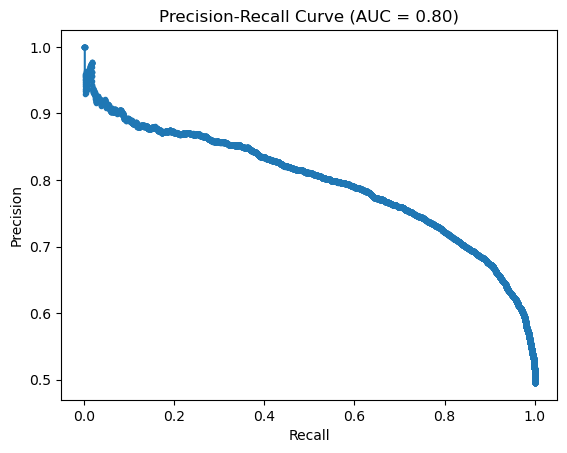

In [80]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

stacked_clf.fit(X_train , y_train)

y_probs = stacked_clf.predict_proba(X_test)

y_probs_positive_class = y_probs[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_probs_positive_class)

auprc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auprc:.2f})')
plt.show()